In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#EDA

In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [6]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df_missing = df[df.isnull().any(axis=1)]
df_missing

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,...,7,0,0,0,0,0,0,3,11,0
27,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,...,1,0,0,0,0,0,0,3,11,0
43,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,...,2,0,0,0,0,0,0,3,11,0
48,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,...,6,0,0,0,0,0,0,3,11,0
58,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,...,6,0,0,0,0,0,0,3,11,0
71,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,...,8,0,0,0,0,0,0,3,11,0
90,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,...,9,0,0,0,0,0,0,3,11,0
91,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,...,7,0,0,0,0,0,0,3,11,0
92,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,...,1,0,0,0,0,0,0,3,11,0
128,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,...,6,0,0,0,0,0,0,3,11,0


In [9]:
df.rename(columns={'Kidhome': 'Kids_at_home', 'Teenhome': 'Teens_at_home', 'Dt_Customer': 'Dt_of-enrollment'}, inplace=True)

In [10]:
df.dropna(inplace=True, axis=0)

In [11]:
df

,Year_Birth,Education,Marital_Status,Income,Kids_at_home,Teens_at_home,Dt_of-enrollment,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df_enc = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
df_enc

,Year_Birth,Income,Kids_at_home,Teens_at_home,Dt_of-enrollment,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,False,False,False,False,False,False,True,False,False,False
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,False,False,False,False,False,False,True,False,False,False
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,False,False,False,False,False,False,False,True,False,False
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,False,False,False,False,False,False,False,True,False,False
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,13-06-2013,46,709,43,182,42,...,False,False,False,False,False,True,False,False,False,False
2236,1946,64014.0,2,1,10-06-2014,56,406,0,30,0,...,False,True,False,False,False,False,False,True,False,False
2237,1981,56981.0,0,0,25-01-2014,91,908,48,217,32,...,False,False,False,False,True,False,False,False,False,False
2238,1956,69245.0,0,1,24-01-2014,8,428,30,214,80,...,True,False,False,False,False,False,False,True,False,False


In [13]:
df_enc[['Year_Enrollment', 'Month_Enrollment', 'Day_Enrollment']] = df_enc['Dt_of-enrollment'].str.split('-', expand=True)
df_enc

,Year_Birth,Income,Kids_at_home,Teens_at_home,Dt_of-enrollment,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Enrollment,Month_Enrollment,Day_Enrollment
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,False,False,False,True,False,False,False,04,09,2012
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,False,False,False,True,False,False,False,08,03,2014
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,False,False,False,False,True,False,False,21,08,2013
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,False,False,False,False,True,False,False,10,02,2014
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,False,False,True,False,False,False,False,19,01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,13-06-2013,46,709,43,182,42,...,False,False,True,False,False,False,False,13,06,2013
2236,1946,64014.0,2,1,10-06-2014,56,406,0,30,0,...,False,False,False,False,True,False,False,10,06,2014
2237,1981,56981.0,0,0,25-01-2014,91,908,48,217,32,...,False,True,False,False,False,False,False,25,01,2014
2238,1956,69245.0,0,1,24-01-2014,8,428,30,214,80,...,False,False,False,False,True,False,False,24,01,2014


In [14]:
df_enc.drop('Year_Enrollment', axis=1, inplace=True)
df_enc.rename(columns={'Day_Enrollment': 'Year_Enrollment'}, inplace=True)
df_enc

,Year_Birth,Income,Kids_at_home,Teens_at_home,Dt_of-enrollment,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Month_Enrollment,Year_Enrollment
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,False,False,False,False,True,False,False,False,09,2012
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,False,False,False,False,True,False,False,False,03,2014
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,False,False,False,False,False,True,False,False,08,2013
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,False,False,False,False,False,True,False,False,02,2014
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,False,False,False,True,False,False,False,False,01,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,13-06-2013,46,709,43,182,42,...,False,False,False,True,False,False,False,False,06,2013
2236,1946,64014.0,2,1,10-06-2014,56,406,0,30,0,...,False,False,False,False,False,True,False,False,06,2014
2237,1981,56981.0,0,0,25-01-2014,91,908,48,217,32,...,False,False,True,False,False,False,False,False,01,2014
2238,1956,69245.0,0,1,24-01-2014,8,428,30,214,80,...,False,False,False,False,False,True,False,False,01,2014


In [15]:
df_enc['Year_Enrollment'] = pd.to_numeric(df_enc['Year_Enrollment'])
df_enc['Year_Birth'] = pd.to_numeric(df_enc['Year_Birth'])

df_enc['Age_at_Enrollment'] = df_enc['Year_Enrollment'] - df_enc['Year_Birth']
df_enc['Age now'] = 2024 - df_enc['Year_Birth']
df_enc

,Year_Birth,Income,Kids_at_home,Teens_at_home,Dt_of-enrollment,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Month_Enrollment,Year_Enrollment,Age_at_Enrollment,Age now
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,False,False,True,False,False,False,09,2012,55,67
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,False,False,True,False,False,False,03,2014,60,70
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,False,False,False,True,False,False,08,2013,48,59
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,False,False,False,True,False,False,02,2014,30,40
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,False,True,False,False,False,False,01,2014,33,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,13-06-2013,46,709,43,182,42,...,False,True,False,False,False,False,06,2013,46,57
2236,1946,64014.0,2,1,10-06-2014,56,406,0,30,0,...,False,False,False,True,False,False,06,2014,68,78
2237,1981,56981.0,0,0,25-01-2014,91,908,48,217,32,...,True,False,False,False,False,False,01,2014,33,43
2238,1956,69245.0,0,1,24-01-2014,8,428,30,214,80,...,False,False,False,True,False,False,01,2014,58,68


In [16]:
df_enc.drop(['Year_Birth', 'Dt_of-enrollment', 'Month_Enrollment', 'Year_Enrollment'], axis=1, inplace=True)
df_enc

,Income,Kids_at_home,Teens_at_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age_at_Enrollment,Age now
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,True,False,False,False,55,67
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,True,False,False,False,60,70
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,True,False,False,48,59
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,True,False,False,30,40
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,True,False,False,False,False,33,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,False,False,False,True,False,False,False,False,46,57
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,False,False,False,False,True,False,False,68,78
2237,56981.0,0,0,91,908,48,217,32,12,24,...,False,False,True,False,False,False,False,False,33,43
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,False,False,True,False,False,58,68


In [17]:
# Create a new column 'Marital_Status_Not_Married'
df_enc['Marital_Status_Not_Married'] = df_enc['Marital_Status_Alone'] | df_enc['Marital_Status_Single'] | df_enc['Marital_Status_Absurd'] | df_enc['Marital_Status_YOLO']

# Drop the original columns
df_enc.drop(['Marital_Status_Alone', 'Marital_Status_Single', 'Marital_Status_Absurd', 'Marital_Status_YOLO'], axis=1, inplace=True)

df_enc

,Income,Kids_at_home,Teens_at_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Age_at_Enrollment,Age now,Marital_Status_Not_Married
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,False,False,False,False,False,False,55,67,True
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,False,False,False,False,False,False,60,70,True
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,False,True,False,48,59,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,False,True,False,30,40,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,True,False,True,False,False,33,43,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,True,False,False,False,True,False,False,46,57,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,False,True,False,False,True,False,68,78,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,True,False,False,True,False,False,False,33,43,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,True,False,False,False,True,False,58,68,False


In [18]:
df_enc['Education_Masters'] = df_enc['Education_Master'] | df_enc['Education_2n Cycle']
df_enc.drop(['Education_Master', 'Education_2n Cycle'], axis=1, inplace=True)
df_enc

,Income,Kids_at_home,Teens_at_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Age_at_Enrollment,Age now,Marital_Status_Not_Married,Education_Masters
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,False,False,False,False,False,55,67,True,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,False,False,False,False,False,60,70,True,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,True,False,48,59,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,True,False,30,40,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,True,False,True,False,False,33,43,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,True,False,False,True,False,False,46,57,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,True,False,False,True,False,68,78,False,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,True,False,True,False,False,False,33,43,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,False,True,False,58,68,False,True


In [19]:
pd.set_option("display.max_rows",33)
df_enc

,Income,Kids_at_home,Teens_at_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Age_at_Enrollment,Age now,Marital_Status_Not_Married,Education_Masters
0,58138.0,0,0,58,635,88,546,172,88,88,...,True,False,False,False,False,False,55,67,True,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,True,False,False,False,False,False,60,70,True,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,True,False,False,False,True,False,48,59,False,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,True,False,False,False,True,False,30,40,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,True,False,True,False,False,33,43,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,True,False,False,True,False,False,46,57,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,True,False,False,True,False,68,78,False,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,True,False,True,False,False,False,33,43,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,False,True,False,58,68,False,True


#K-Means Clustering

In [20]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
train_data = std.fit_transform(df_enc)
scale_data = pd.DataFrame(data=train_data ,columns= df_enc.columns)
scale_data

,Income,Kids_at_home,Teens_at_home,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Graduation,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Together,Marital_Status_Widow,Age_at_Enrollment,Age now,Marital_Status_Not_Married,Education_Masters
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,0.992806,-0.526530,-0.341958,-0.794110,-0.590553,-0.188452,0.897752,0.986443,1.906825,-0.584993
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,0.992806,-0.526530,-0.341958,-0.794110,-0.590553,-0.188452,1.313688,1.236801,1.906825,-0.584993
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0.992806,-0.526530,-0.341958,-0.794110,1.693329,-0.188452,0.315443,0.318822,-0.524432,-0.584993
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,0.992806,-0.526530,-0.341958,-0.794110,1.693329,-0.188452,-1.181925,-1.266777,-0.524432,-0.584993
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,-1.007246,1.899228,-0.341958,1.259271,-0.590553,-0.188452,-0.932363,-1.016420,-0.524432,-0.584993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,...,0.992806,-0.526530,-0.341958,1.259271,-0.590553,-0.188452,0.149069,0.151917,-0.524432,-0.584993
2212,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,...,-1.007246,1.899228,-0.341958,-0.794110,1.693329,-0.188452,1.979184,1.904422,-0.524432,-0.584993
2213,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,...,0.992806,-0.526530,2.924333,-0.794110,-0.590553,-0.188452,-0.932363,-1.016420,-0.524432,-0.584993
2214,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,...,-1.007246,-0.526530,-0.341958,-0.794110,1.693329,-0.188452,1.147313,1.069896,-0.524432,1.709422


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principal_components =pca.fit_transform(scale_data)
principal_components

array([[ 3.84784657, -0.54120966],
       [-2.2146597 ,  0.9235161 ],
       [ 1.67726682,  0.09377366],
       ...,
       [ 1.42897244, -0.74185312],
       [ 1.80663055,  1.97509178],
       [-1.57256032,  1.97344425]])

In [22]:
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for principal components
prin_df = pd.DataFrame(data=principal_components,
                            columns=[f'PC{i+1}' for i in range(len(explained_variance))])

print("Explained variance ratio by each principal component:", explained_variance)
print("Principal components DataFrame:\n")
prin_df

Explained variance ratio by each principal component: [0.20008812 0.08042219]
Principal components DataFrame:



,PC1,PC2
0,3.847847,-0.541210
1,-2.214660,0.923516
2,1.677267,0.093774
3,-2.573896,-1.790473
4,-0.545985,-0.574970
...,...,...
2211,2.407484,0.451328
2212,-0.765806,3.532621
2213,1.428972,-0.741853
2214,1.806631,1.975092


In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


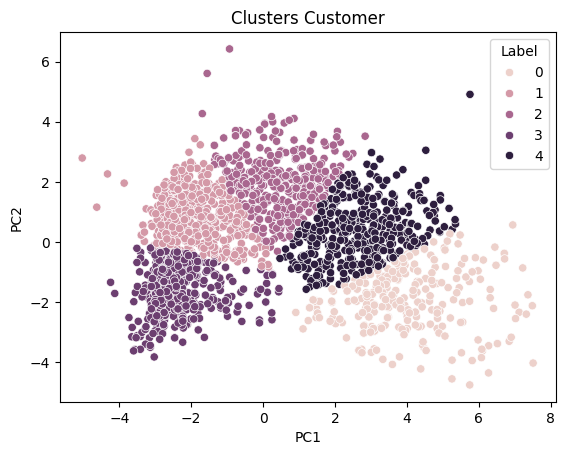

In [24]:
y_cluster = km.fit_predict(prin_df)
new_data_label = prin_df.copy()
new_data_label["Label"] = y_cluster

plt.title("Clusters Customer")
sns.scatterplot(data= new_data_label , x="PC1" ,y= "PC2" , hue="Label")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

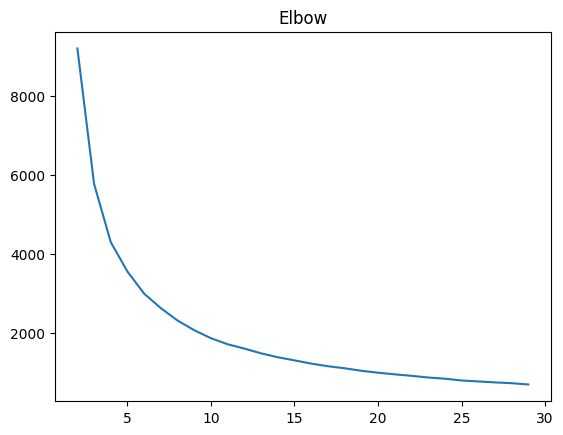

In [25]:
k = []

for i in  range(2,30) :
    km = KMeans(n_clusters=i ,random_state=42)
    km.fit_predict(prin_df)
    k.append(km.inertia_)



#Plot Result

plt.title("Elbow")
plt.plot(np.arange(2,30) , k)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

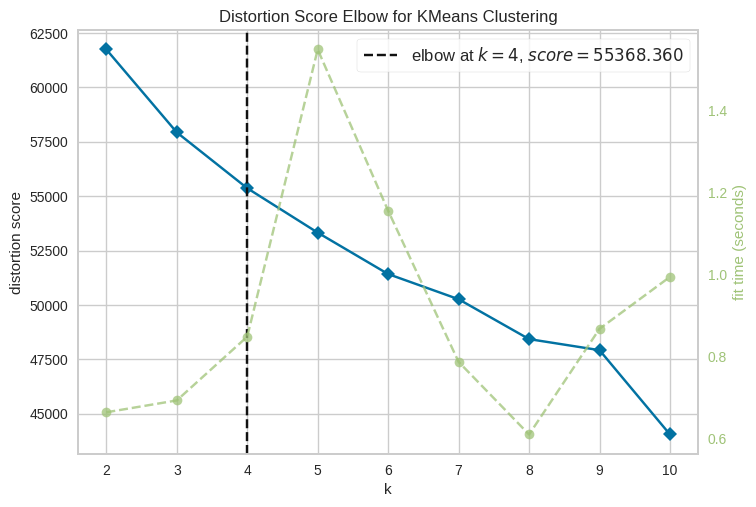

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km ).fit(scale_data)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


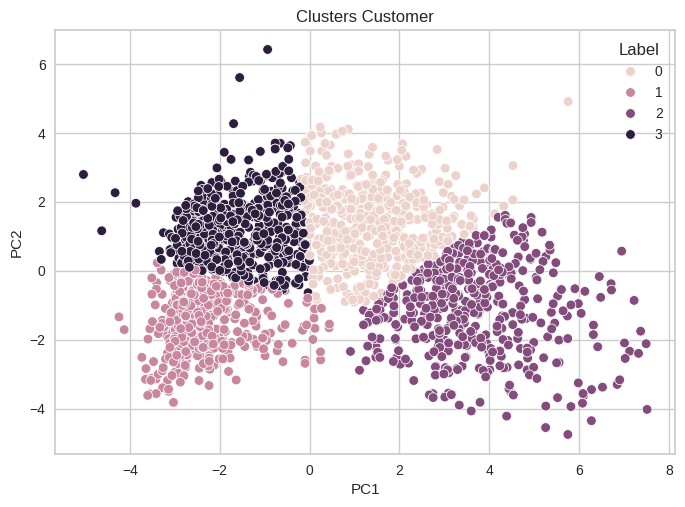

In [27]:
km = KMeans(n_clusters=4)
y_cluster = km.fit_predict(prin_df)
new_data_label = prin_df.copy()
new_data_label["Label"] = y_cluster

plt.title("Clusters Customer")
sns.scatterplot(data= new_data_label , x="PC1" ,y= "PC2" , hue="Label")
plt.show()